---
title: "Filtering Operators"
description: "In this tutorial we are going to learn how to apply blurring filters to images with `kornia.filters` components."
author:
    - "Edgar Riba"
date: 07-06-2021
categories:
    - Basic
    - Filters
    - Blur
    - kornia.filters
image: "../tutorials/assets/filtering_operators.png"
---

<a href="https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/nbs/filtering_operators.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in google colab"></a>

<a href="https://huggingface.co/spaces/kornia/kornia-image-filtering"><img src="https://img.shields.io/badge/%F0%9F%A4%97%20Hugging%20Face-Spaces-blue.svg" alt="Open in HF Spaces"></a>

In [ ]:
%%capture
!pip install kornia
!pip install kornia-rs

In [ ]:
import io

import requests


def download_image(url: str, filename: str = "") -> str:
    filename = url.split("/")[-1] if len(filename) == 0 else filename
    # Download
    bytesio = io.BytesIO(requests.get(url).content)
    # Save file
    with open(filename, "wb") as outfile:
        outfile.write(bytesio.getbuffer())

    return filename


url = "https://github.com/kornia/data/raw/main/drslump.jpg"
download_image(url)

'drslump.jpg'

In [ ]:
import kornia as K
import torch
import torchvision
from matplotlib import pyplot as plt

We use Kornia to load an image to memory represented directly in a tensor

In [ ]:
x_rgb: torch.Tensor = K.io.load_image("doraemon.png", K.io.ImageLoadType.RGB32)[None, ...]  # BxCxHxW

x_gray = K.color.rgb_to_grayscale(x_rgb)

In [ ]:
def imshow(input: torch.Tensor):
    if input.shape != x_rgb.shape:
        input = K.geometry.resize(input, size=(x_rgb.shape[-2:]))
    out = torch.cat([x_rgb, input], dim=-1)
    out = torchvision.utils.make_grid(out, nrow=2, padding=5)
    out_np = K.utils.tensor_to_image(out)
    plt.imshow(out_np)
    plt.axis("off")
    plt.show()

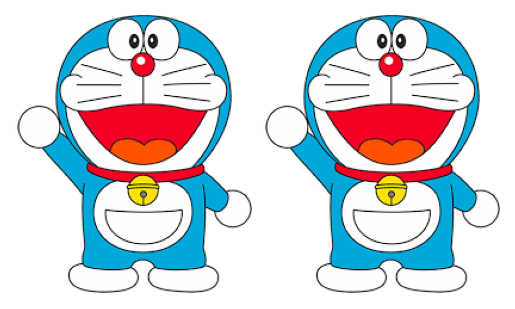

In [ ]:
imshow(x_rgb)

## Box Blur

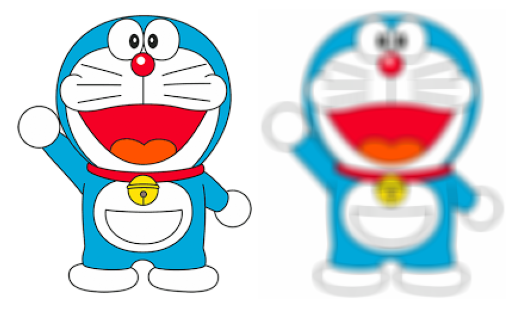

In [ ]:
x_blur: torch.Tensor = K.filters.box_blur(x_rgb, (9, 9))
imshow(x_blur)

## Blur Pool

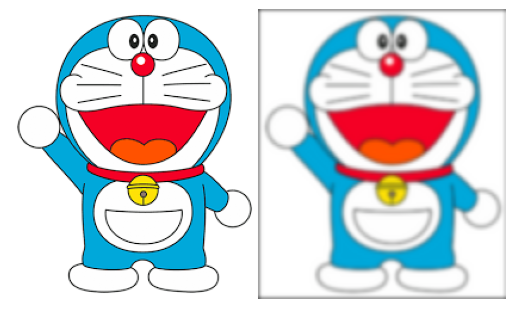

In [ ]:
x_blur: torch.Tensor = K.filters.blur_pool2d(x_rgb, kernel_size=9)
imshow(x_blur)

## Gaussian Blur

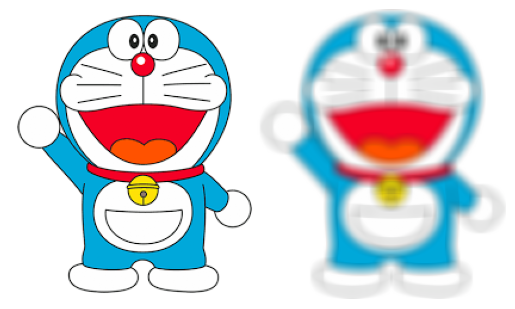

In [ ]:
x_blur: torch.Tensor = K.filters.gaussian_blur2d(x_rgb, (11, 11), (11.0, 11.0))
imshow(x_blur)

## Max Pool

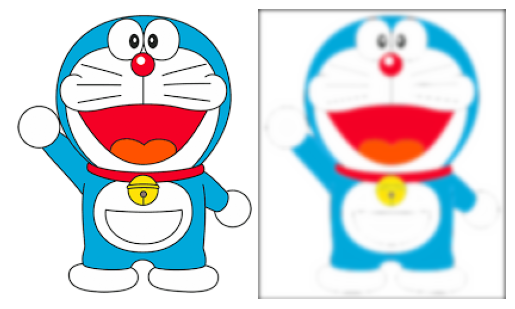

In [ ]:
x_blur: torch.Tensor = K.filters.max_blur_pool2d(x_rgb, kernel_size=11)
imshow(x_blur)

## Median Blur

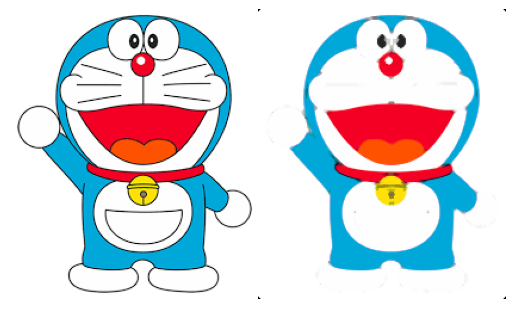

In [ ]:
x_blur: torch.Tensor = K.filters.median_blur(x_rgb, (5, 5))
imshow(x_blur)

## Motion Blur

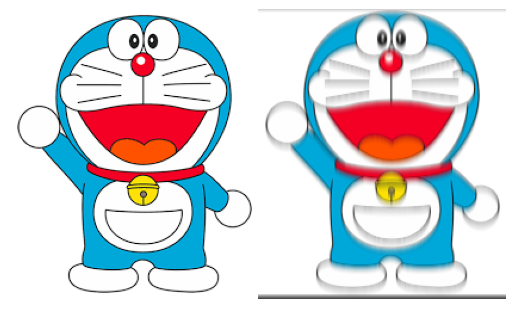

In [ ]:
x_blur: torch.Tensor = K.filters.motion_blur(x_rgb, 9, 90.0, 1)
imshow(x_blur)